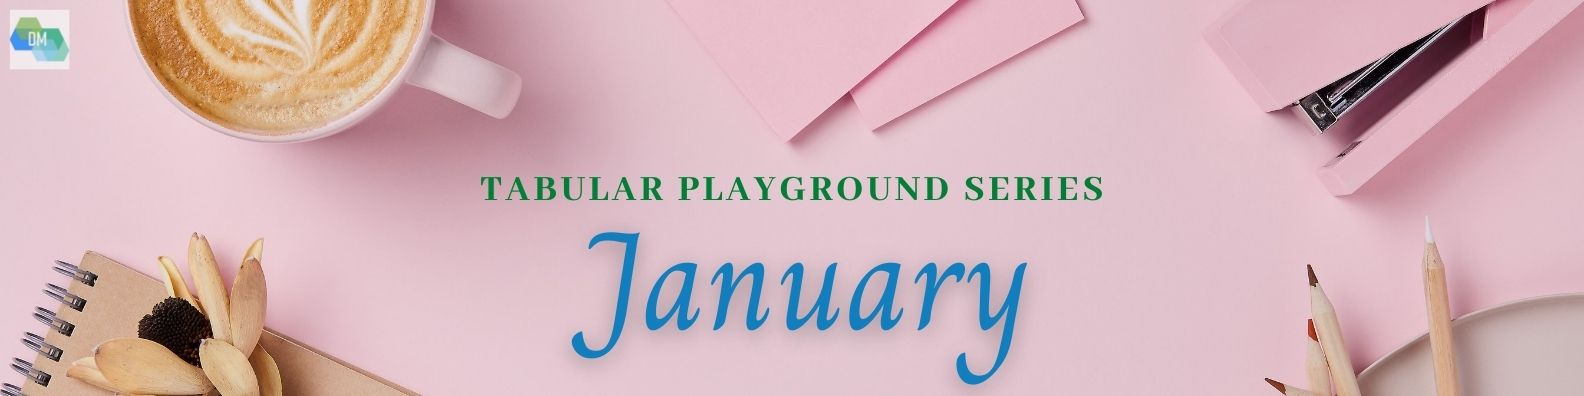

**Observations on this TPS dataset:**
- `num_sold` column is the target variable
- `Train` dataset has `26298` rows and `6` columns which contains`4` features, `1` target variable `num_sold` and `1` column of `row_id`
- `Test` dataset has `6570` rows and `5` columns which contains`4` features with`1` column of `row_id`
- No missing values in train and test dataset

<h3 style="font-family: Arial;background-color:#c1fba4;color:black;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>Importing Libraries & Packages 📚 </centre></strong></h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

<h3 style="font-family: Arial;background-color:#c1fba4;color:black;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>Importing & Reading the dataset 📝 </centre></strong></h3>

In [2]:
df_train = pd.read_csv("../input/tabular-playground-series-jan-2022/train.csv",index_col = 'row_id')
df_test = pd.read_csv("../input/tabular-playground-series-jan-2022/test.csv",index_col = 'row_id')
df_subm = pd.read_csv("../input/tabular-playground-series-jan-2022/sample_submission.csv",index_col = 'row_id')

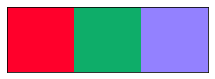

In [3]:
#Custom Color Palette 🎨
custom_colors = ["#ff002b","#0ead69","#9381ff"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))
sns.palplot(sns.color_palette(custom_colors),size=1.2)
plt.tick_params(axis='both', labelsize=0, length = 0)

In [4]:
df_train_row_count, df_train_column_count = df_train.shape
print('Total number of rows:', df_train_row_count) 
print('Total number of columns:', df_train_column_count)

Total number of rows: 26298
Total number of columns: 5


In [5]:
df_test_row_count, df_test_column_count = df_test.shape
print('Total number of rows:', df_test_row_count)
print('Total number of columns:', df_test_column_count) 

Total number of rows: 6570
Total number of columns: 4


In [6]:
df_train.head()

,date,country,store,product,num_sold
row_id,,,,,
0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


In [7]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
num_sold,26298.0,387.533577,266.076193,70.0,190.0,315.0,510.0,2884.0


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26298 entries, 0 to 26297
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      26298 non-null  object
 1   country   26298 non-null  object
 2   store     26298 non-null  object
 3   product   26298 non-null  object
 4   num_sold  26298 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.2+ MB


In [9]:
df_train['date'] = pd.to_datetime(df_train['date'])
df_train['year']=df_train['date'].dt.year
df_train['month']=df_train['date'].dt.month
df_train['day'] = df_train['date'].dt.day
df_train['day_of_yr'] = df_train['date'].dt.dayofyear
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26298 entries, 0 to 26297
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       26298 non-null  datetime64[ns]
 1   country    26298 non-null  object        
 2   store      26298 non-null  object        
 3   product    26298 non-null  object        
 4   num_sold   26298 non-null  int64         
 5   year       26298 non-null  int64         
 6   month      26298 non-null  int64         
 7   day        26298 non-null  int64         
 8   day_of_yr  26298 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 2.0+ MB
None


In [10]:
df_test['date'] = pd.to_datetime(df_test['date'])
df_test['year']=df_test['date'].dt.month
df_test['month']=df_test['date'].dt.month
df_test['day'] = df_test['date'].dt.day
df_test['day_of_yr'] = df_test['date'].dt.dayofyear
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6570 entries, 26298 to 32867
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       6570 non-null   datetime64[ns]
 1   country    6570 non-null   object        
 2   store      6570 non-null   object        
 3   product    6570 non-null   object        
 4   year       6570 non-null   int64         
 5   month      6570 non-null   int64         
 6   day        6570 non-null   int64         
 7   day_of_yr  6570 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 462.0+ KB
None


In [11]:
print('Duration (Train Date): ', df_train['date'].min(), df_train['date'].max())
print('Duration (Test Date): ', df_test['date'].min(), df_test['date'].max())

Duration (Train Date):  2015-01-01 00:00:00 2018-12-31 00:00:00
Duration (Test Date):  2019-01-01 00:00:00 2019-12-31 00:00:00


In [12]:
data = df_train.groupby('year').agg({'num_sold':'mean'}).reset_index()

In [13]:
data.head()

,year,num_sold
0,2015,364.382192
1,2016,364.807529
2,2017,396.011720
3,2018,424.995129


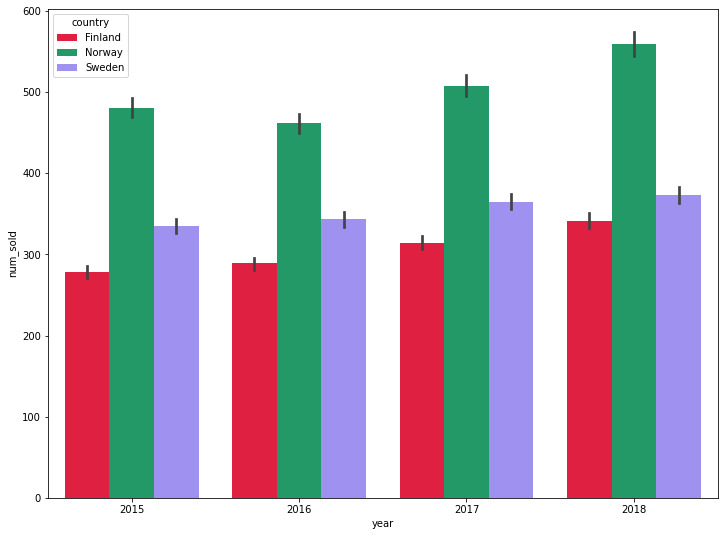

In [14]:
fig = plt.subplots(1, 1, figsize=(12, 9))
sns.barplot(df_train['year'],df_train['num_sold'],hue=df_train['country'])
plt.show()

<h3 style="font-family: Arial;background-color:#c1fba4;color:black;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>Checking for missing values ✏️ </centre></strong></h3>

In [15]:
df_train.isna().sum()

date         0
country      0
store        0
product      0
num_sold     0
year         0
month        0
day          0
day_of_yr    0
dtype: int64

In [16]:
df_test.isna().sum()

date         0
country      0
store        0
product      0
year         0
month        0
day          0
day_of_yr    0
dtype: int64

In [17]:
print ("Unique values are:\n",df_train.nunique())

Unique values are:
 date         1461
country         3
store           2
product         3
num_sold     1377
year            4
month          12
day            31
day_of_yr     366
dtype: int64


<AxesSubplot:xlabel='num_sold', ylabel='Density'>

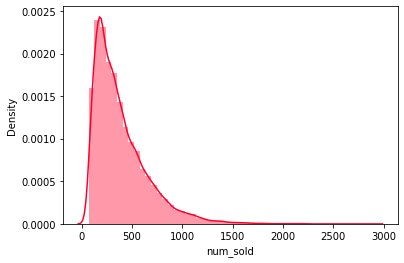

In [18]:
sns.distplot(df_train['num_sold'])

In [19]:
df_train.store.unique()

array(['KaggleMart', 'KaggleRama'], dtype=object)

In [20]:
df_train.country.unique()

array(['Finland', 'Norway', 'Sweden'], dtype=object)

In [21]:
country1 = df_train[df_train.country == 'Finland']
country1 = pd.DataFrame(country1.groupby('product')['num_sold'].sum()).reset_index()
country2 = df_train[df_train.country == 'Norway']
country2 = pd.DataFrame(country2.groupby('product')['num_sold'].sum()).reset_index()
country3 = df_train[df_train.country == 'Sweden']
country3 = pd.DataFrame(country3.groupby('product')['num_sold'].sum()).reset_index()

In [22]:
fig = go.Figure()
fig.add_trace(go.Pie(values = df_train['num_sold'],labels = df_train['product'],hole = 0.6, hoverinfo ='label+percent'))
fig.update_traces(textfont_size = 13, hoverinfo ='label+percent',textinfo='label+percent', showlegend = False,marker = dict(colors =["#ff002b","#0ead69","#9381ff"]),title = dict(text = 'Kaggle Products Sales'))  
fig.show()

In [23]:
fig = go.Figure()
fig.add_trace(go.Pie(values = country1['num_sold'],labels = country1['product'],hole = 0.6, hoverinfo ='label+percent'))
fig.update_traces(textfont_size=13, hoverinfo ='label+percent',textinfo='label+percent',showlegend = False, marker = dict(colors =["#ff002b","#0ead69","#9381ff"]),title = dict(text = 'Kaggle Products Sales in Finland'))  
fig.show()

In [24]:
fig = go.Figure()
fig.add_trace(go.Pie(values = country2['num_sold'],labels = country2['product'],hole = 0.6, hoverinfo ='label+percent'))
fig.update_traces(textfont_size=13, hoverinfo ='label+percent',textinfo='label+percent',showlegend = False, marker = dict(colors =["#ff002b","#0ead69","#9381ff"]),title = dict(text = 'Kaggle Products Sales in Norway'))  
fig.show()

In [25]:
fig = go.Figure()
fig.add_trace(go.Pie(values = country3['num_sold'],labels = country3['product'],hole = 0.6, hoverinfo ='label+percent'))
fig.update_traces(textfont_size=13, hoverinfo ='label+percent',textinfo='label+percent',showlegend = False, marker = dict(colors =["#ff002b","#0ead69","#9381ff"]),title = dict(text = 'Kaggle Products Sales in Sweden'))  
fig.show()

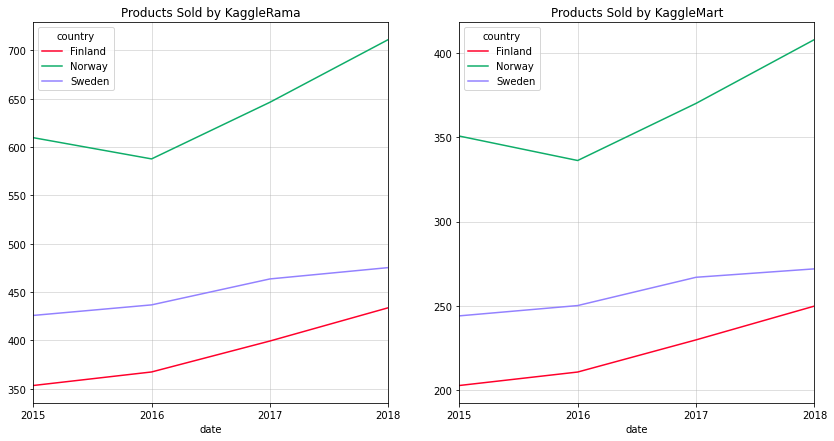

In [26]:
store1 = df_train[df_train['store']=='KaggleRama']
store2 = df_train[df_train['store']=='KaggleMart']
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(14, 7))
store1.set_index('date').groupby([pd.Grouper(freq='Y'),'country'])['num_sold'].mean().unstack().plot(ax=ax0)
store2.set_index('date').groupby([pd.Grouper(freq='Y'),'country'])['num_sold'].mean().unstack().plot(ax=ax1)
ax0.set_title('Products Sold by KaggleRama')
ax1.set_title('Products Sold by KaggleMart')
ax0.grid(alpha=0.5)
ax1.grid(alpha=0.5)
plt.show()

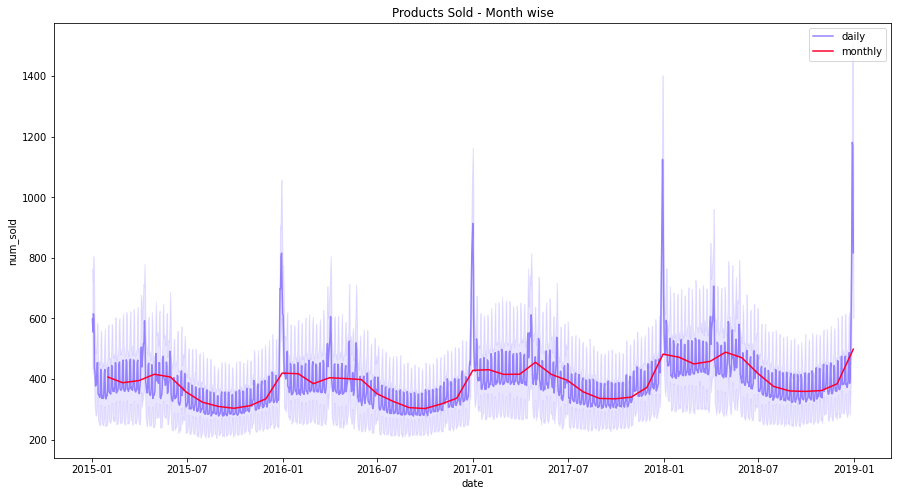

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
df_month = df_train.set_index('date').groupby([pd.Grouper(freq='M')])[['num_sold']].mean()
sns.lineplot(x="date", y="num_sold", data=df_train, ax=ax, label='daily',color='#9381ff')
sns.lineplot(x="date", y="num_sold", data=df_month, ax=ax, label='monthly', color='#ff002b')
ax.set_title('Products Sold - Month wise')
ax.legend()
plt.show()

In [28]:
df_train["product"].unique()

array(['Kaggle Mug', 'Kaggle Hat', 'Kaggle Sticker'], dtype=object)

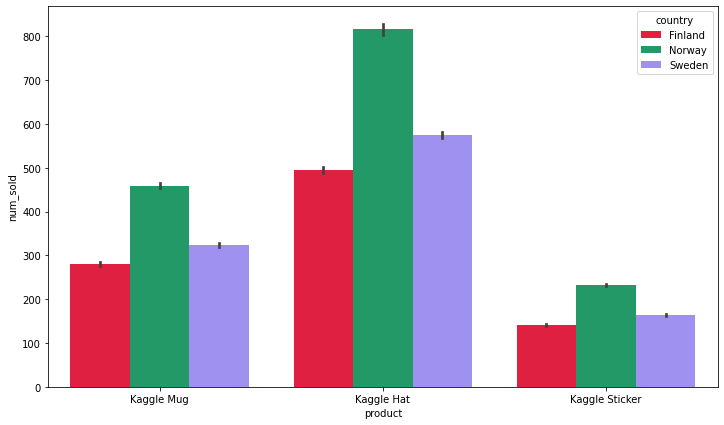

In [29]:
fig = plt.subplots(1, 1, figsize=(12, 7))
sns.barplot(df_train['product'],df_train['num_sold'],hue=df_train['country'])
plt.show()

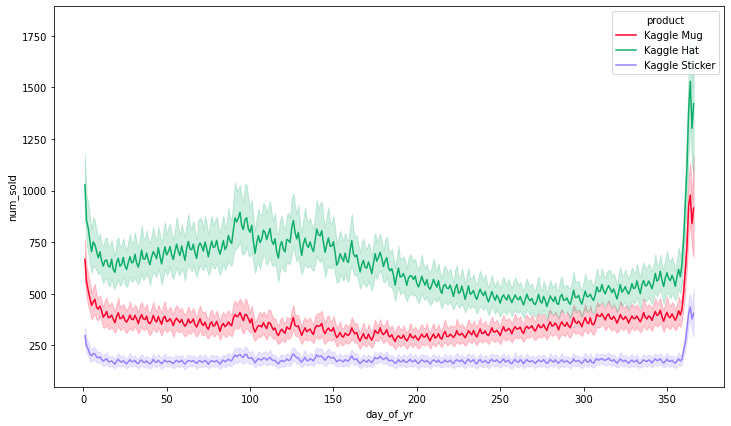

In [30]:
fig = plt.subplots(1, 1, figsize=(12, 7))
sns.lineplot(x="day_of_yr", y="num_sold", data=df_train, hue="product")
plt.show()

<h3 style="font-family: Arial;background-color:#c1fba4;color:black;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>PyCaret </centre></strong></h3>

In [31]:
!pip install pycaret[full]

In [32]:
from pycaret.regression import *

In [33]:
model = setup(data = df_train, target = 'num_sold', normalize = True, normalize_method = 'robust', use_gpu = True, feature_interaction = True, n_jobs = -1, session_id = 1, data_split_shuffle = False,transform_target = True,create_clusters = False)

,Description,Value
0,session_id,1
1,Target,num_sold
2,Original Data,"(26298, 9)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(18408, 52)"


In [34]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,cuml.linear_model.linear_regression.LinearRegr...,True
lasso,Lasso Regression,cuml.linear_model.lasso.Lasso,True
ridge,Ridge Regression,cuml.linear_model.ridge.Ridge,True
en,Elastic Net,cuml.linear_model.elastic_net.ElasticNet,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [35]:
top_per = compare_models(n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,24.8849,2214.8976,43.8283,0.9690,0.0850,0.0623,5.9530
lightgbm,Light Gradient Boosting Machine,25.5828,2235.5005,44.3598,0.9683,0.0875,0.0645,1.0820
xgboost,Extreme Gradient Boosting,26.1167,2252.8685,45.0283,0.9672,0.0892,0.0662,0.5410
gbr,Gradient Boosting Regressor,27.5569,2457.0732,47.2064,0.9634,0.0949,0.0704,3.2130
rf,Random Forest Regressor,28.9363,2689.0166,49.8313,0.9597,0.0989,0.0731,2.1910
et,Extra Trees Regressor,29.8833,3034.8979,52.2527,0.9556,0.1011,0.0746,9.5890
dt,Decision Tree Regressor,37.5966,4279.3763,62.7897,0.9355,0.1266,0.0961,0.2290
knn,K Neighbors Regressor,34.9409,4982.1963,64.5059,0.9272,0.1272,0.0869,0.2280
br,Bayesian Ridge,39.4564,5474.2378,67.9457,0.9210,0.1298,0.0975,0.1890
ridge,Ridge Regression,39.4534,5474.5988,67.9447,0.9210,0.1298,0.0974,0.0390


In [36]:
blend = blend_models(top_per)
predict_model(blend);

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,29.0899,2723.1003,52.1833,0.9659,0.0960,0.0680
1,29.2266,2266.5095,47.6079,0.9673,0.1005,0.0790
2,14.5842,452.8924,21.2813,0.9858,0.0586,0.0477
3,24.7679,2262.9140,47.5701,0.9666,0.0822,0.0588
4,33.5564,3955.1066,62.8896,0.9524,0.1111,0.0760
5,19.3615,940.9192,30.6744,0.9786,0.0739,0.0591
6,15.8589,535.6017,23.1431,0.9831,0.0635,0.0491
7,29.5624,3228.0231,56.8157,0.9636,0.0866,0.0607
8,33.4801,3863.3502,62.1559,0.9563,0.1105,0.0740
9,16.4260,547.5898,23.4006,0.9857,0.0603,0.0489


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,43.0260,5796.3164,76.1335,0.9316,0.1201,0.0887


In [37]:
final_blend = finalize_model(blend)
predict_model(final_blend);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,20.7131,1061.0960,32.5745,0.9875,0.0612,0.0479


In [38]:
pred_blend = predict_model(final_blend, data=df_test)
pred_blend.head()

,date,country,store,product,year,month,day,day_of_yr,Label
row_id,,,,,,,,,
26298,2019-01-01,Finland,KaggleMart,Kaggle Mug,1,1,1,1,381.407342
26299,2019-01-01,Finland,KaggleMart,Kaggle Hat,1,1,1,1,563.584703
26300,2019-01-01,Finland,KaggleMart,Kaggle Sticker,1,1,1,1,158.921536
26301,2019-01-01,Finland,KaggleRama,Kaggle Mug,1,1,1,1,656.771760
26302,2019-01-01,Finland,KaggleRama,Kaggle Hat,1,1,1,1,989.025290


In [39]:
df_subm = pd.DataFrame(list(zip(df_test.index, pred_blend.Label)),columns = ['row_id', 'num_sold'])
df_subm.to_csv('submission.csv', index = False)
df_subm

,row_id,num_sold
0,26298,381.407342
1,26299,563.584703
2,26300,158.921536
3,26301,656.771760
4,26302,989.025290
...,...,...
6565,32863,827.821786
6566,32864,251.544141
6567,32865,931.666593
6568,32866,1515.230009


<h3 style="font-family: Arial;background-color:#c1fba4;color:black;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>If you found this notebook useful, please Upvote. Thanks!  </centre></strong></h3>